### Patrick Khoury | 505-618-056

# Importing Data

In [14]:

import pandas as pd

# Must put client ID / client Secret in different text file to not compromise information
import sys
sys.path.append('/home/jovyan')
import spotify_key

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Call the separate text file info for client ID/ client secret
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=spotify_key.SPOTIPY_CLIENT_ID,
                                                          client_secret=spotify_key.SPOTIPY_CLIENT_SECRET))

def call_playlist(creator, playlist_id):
    
    #General Pandas df

    playlist_audio_features_list = ["artist","album","track_name","track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_audio_features_list)
    
    #Getting Information
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
      
        # Create empty dict
        playlist_audio_features = {}
        # Get artist, album, track name, track id
        playlist_audio_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_audio_features["album"] = track["track"]["album"]["name"]
        playlist_audio_features["track_name"] = track["track"]["name"]
        playlist_audio_features["track_id"] = track["track"]["id"]
        
        # Get audio features utilizing API
        audio_features = sp.audio_features(playlist_audio_features["track_id"])[0]
        for feature in playlist_audio_features_list[4:]:
            playlist_audio_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_audio_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    # Function commands done
        
    return playlist_df
  
playlist1 = call_playlist("patrick khoury","5bKOCJ2v5M9KQtv8Po7u62")


# Organizing and Merging Data

In [24]:
# Data Frame 2 with # Of Streams, Year, Genre
 
import pandas as pd
import numpy as np
Streams_genres_year_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS5ctdm3QExzmFq0Y56b2RicAy9h3iFQLocFMmdtz2gXZthg7ttw39ZCpPz73h2Zwa32qwfER85MLlz/pub?gid=0&single=true&output=csv')

conditions = [
  (Streams_genres_year_df['Year'] >= 2020), 
  (Streams_genres_year_df['Year'] < 2020) & (Streams_genres_year_df['Year'] >= 2015),
  (Streams_genres_year_df['Year'] < 2015) & (Streams_genres_year_df['Year'] >= 2010),
  (Streams_genres_year_df['Year'] < 2010) & (Streams_genres_year_df['Year'] >= 2005),
  (Streams_genres_year_df['Year'] < 2005) & (Streams_genres_year_df['Year'] >= 2000),
  (Streams_genres_year_df['Year'] < 2000) & (Streams_genres_year_df['Year'] >= 1995),
  (Streams_genres_year_df['Year'] < 1995) & (Streams_genres_year_df['Year'] >= 1990),
  (Streams_genres_year_df['Year'] < 1990) & (Streams_genres_year_df['Year'] >= 1985),
  (Streams_genres_year_df['Year'] < 1985) & (Streams_genres_year_df['Year'] >= 1980),
  (Streams_genres_year_df['Year'] < 1980) & (Streams_genres_year_df['Year'] >= 1975),
  (Streams_genres_year_df['Year'] < 1975) & (Streams_genres_year_df['Year'] >= 1970)
]

values = ['Early 2020s', 'Late 2010s', 'Early 2010s', 'Late 2000s', 'Early 2000s', 'Late 1990s', 'Early 1990s', 'Late 1980s', 'Early 1980s', 'Late 1970s', 'Early 1970s']

Streams_genres_year_df['Decade'] = np.select(conditions, values)
  
  
# Streams_genres_year_df -- used as check, calling data frame

# Merging Data Frame 1 with Data Frame 2

combine_df = [playlist1, Streams_genres_year_df]

final_df = pd.concat(combine_df, axis=1)



# Cleaning final_df Data

In [25]:
# Checking for null values:

final_df.isnull().sum()


artist              0
album               0
track_name          0
track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
Streams             0
Genre               0
Year                0
Decade              0
dtype: int64

In [22]:
# Checking for duplicates:

final_df.duplicated().value_counts()

# The current list only features the top 100 songs. The spotify api/the most 
# streamed list featured duplicates of certain songs. These duplicates will
# be dropped from the data frame when all songs are included in the df.


False    100
dtype: int64

# Processing Data

In [27]:
# Print final pandas data frame to demonstrate that the two lists have been
# combined

final_df

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Streams,Genre,Year,Decade
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1,-5.934,1,0.0598,0.000095,0.0897,0.334,171.005,200040,4,"3,703,895,074",R&B/Soul,2020,Early 2020s
1,Ed Sheeran,÷ (Deluxe),Shape of You,7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1,-3.183,0,0.0802,0.000000,0.0931,0.931,95.977,233713,4,"3,562,543,890",Pop,2017,Late 2010s
2,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,0.501,0.405,1,-5.679,1,0.0319,0.000000,0.1050,0.446,109.891,182161,4,"2,887,241,814",Pop,2019,Late 2010s
3,Tones And I,Dance Monkey (Stripped Back) / Dance Monkey,Dance Monkey,2XU0oxnq2qxCpomAAuJY8K,0.824,0.588,6,-6.400,0,0.0924,0.000104,0.1490,0.513,98.027,209438,4,"2,864,791,672",Pop,2019,Late 2010s
4,Various Artists,Spider-Man: Into the Spider-Verse (Soundtrack ...,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,0.760,0.479,2,-5.574,1,0.0466,0.000000,0.0703,0.913,89.911,158040,4,"2,808,096,550",Hip-Hop,2018,Late 2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Queen,Jazz,Don't Stop Me Now,43DHLzDkncpby82Po5jlOZ,0.561,0.757,5,-10.061,1,0.1920,0.001270,0.5580,0.640,156.432,209560,4,"1,646,040,433",Rock,1979,Late 1970s
96,Bruno Mars,Doo-Wops & Hooligans,Just the Way You Are,7BqBn9nzAq8spo5e7cZ0dJ,0.635,0.841,5,-5.379,1,0.0422,0.000000,0.0622,0.424,109.021,220734,4,"1,645,175,247",Pop,2010,Early 2010s
97,Luis Fonsi,VIDA,Despacito,6habFhsOp2NvshLv26DqMb,0.655,0.797,2,-4.787,1,0.1530,0.000000,0.0670,0.839,177.928,229360,4,"1,639,266,003",Reggaeton,2017,Late 2010s
98,Wiz Khalifa,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),2JzZzZUQj3Qff7wapcbKjc,0.689,0.481,10,-7.503,1,0.0815,0.000001,0.0649,0.283,80.025,229526,4,"1,635,982,575",Pop,2015,Late 2010s


# Exploratory Statistical Analysis

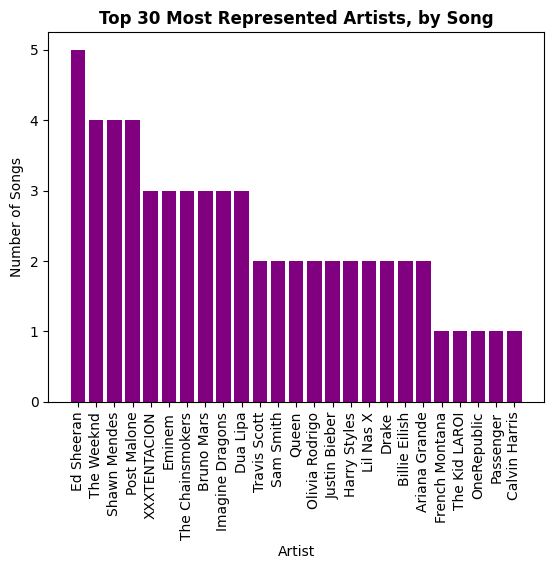

In [103]:
import matplotlib.pyplot as plt

# Most Represented Artists
artists_by_song=final_df.groupby(['artist'], as_index=False).count().sort_values(by='track_name', ascending=False).head(25)

x = artists_by_song['artist']
y = artists_by_song['track_name']

plt.bar(x, y, color= 'purple')
plt.title('Top 30 Most Represented Artists, by Song', fontweight='bold')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation='vertical')
plt.show()


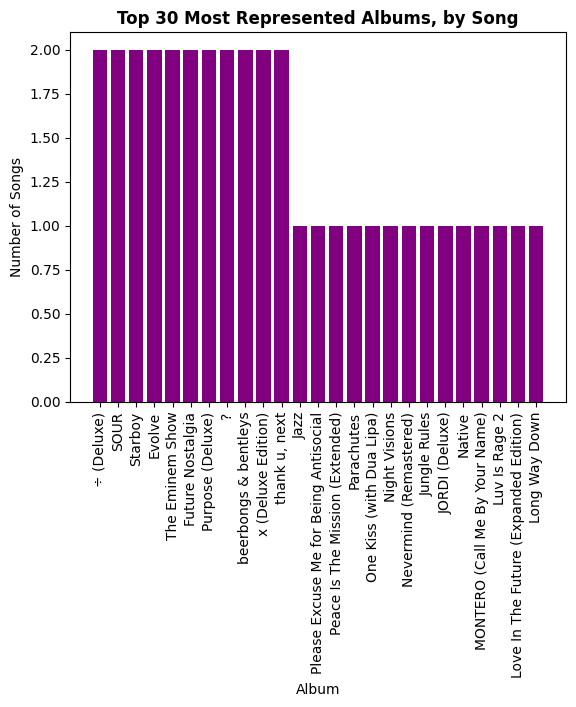

In [118]:
# Most Represented Albums
album_by_song=final_df.groupby(['album'], as_index=False).count().sort_values(by='track_name', ascending=False).head(25)

x = album_by_song['album']
y = album_by_song['track_name']

plt.bar(x, y, color= 'purple')
plt.title('Top 30 Most Represented Albums, by Song', fontweight='bold')
plt.xlabel('Album')
plt.ylabel('Number of Songs')
plt.xticks(rotation='vertical')
plt.show()


### fix artists by total stream counts

In [136]:
# Artists by stream count (List and Bar Chart)

# Most Represented Artists
# artists_by_streams=final_df.groupby(['Streams'], as_index=False).count().sum().sort_values(by='Streams', ascending=False).head(25)

# x = artists_by_streams['artist']
# y = artists_by_streams['Streams']

# plt.bar(x, y, color= 'purple')
# plt.title('Top 30 Most Represented Artists, by Song', fontweight='bold')
# plt.xlabel('Artist')
# plt.ylabel('Number of Songs')
# plt.xticks(rotation='vertical')
# plt.show()

### FIX PIE CHART

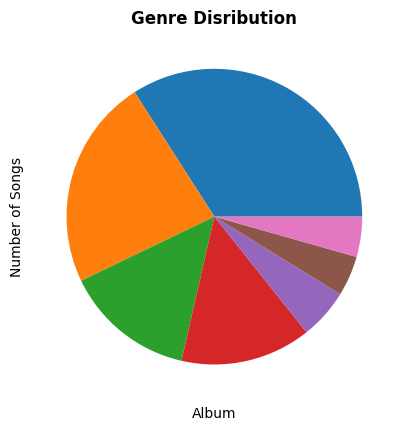

In [125]:
# Pie Chart Sorted by Genre (List and Pie Chart)

# Most Represented Albums
genre_by_song=final_df.groupby(['Genre'], as_index=False).count().sort_values(by='track_name', ascending=False).head(7)

x = genre_by_song['Genre']
y = genre_by_song['track_name']

plt.pie(y)
plt.title('Genre Disribution', fontweight='bold')
plt.show()



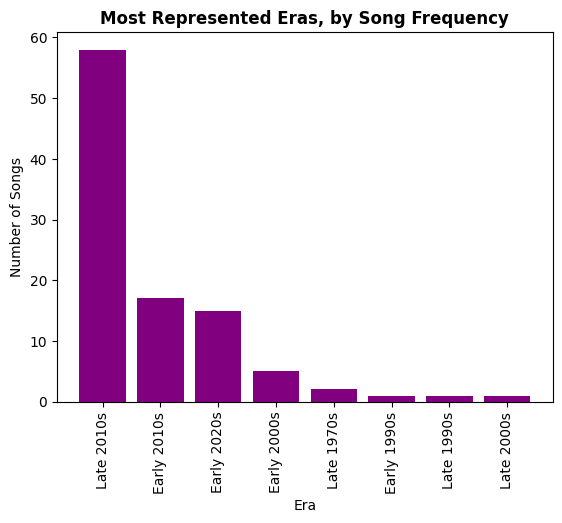

In [116]:
# Sort By Eras (List and Bar Chart)

decade_by_song=final_df.groupby(['Decade'], as_index=False).count().sort_values(by='track_name', ascending=False).head(25)

x = decade_by_song['Decade']
y = decade_by_song['track_name']

plt.bar(x, y, color= 'purple')
plt.title('Most Represented Eras, by Song Frequency', fontweight='bold')
plt.xlabel('Era')
plt.ylabel('Number of Songs')
plt.xticks(rotation='vertical')
plt.show()



### make following plots all in same subplot

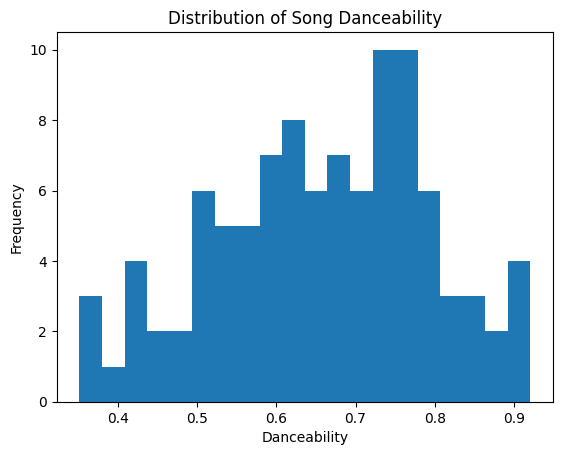

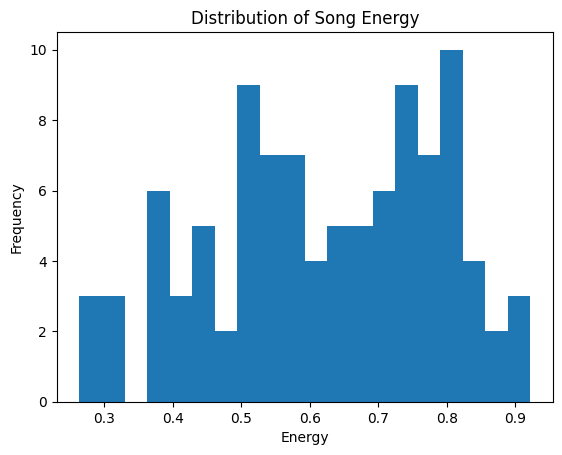

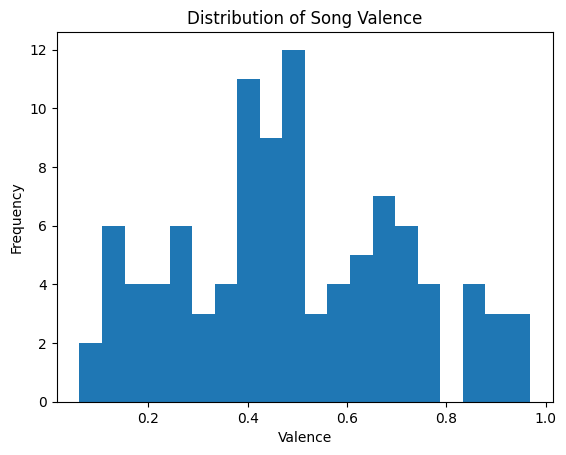

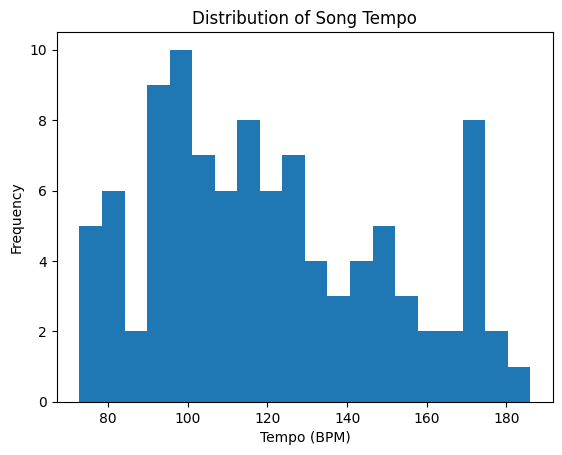

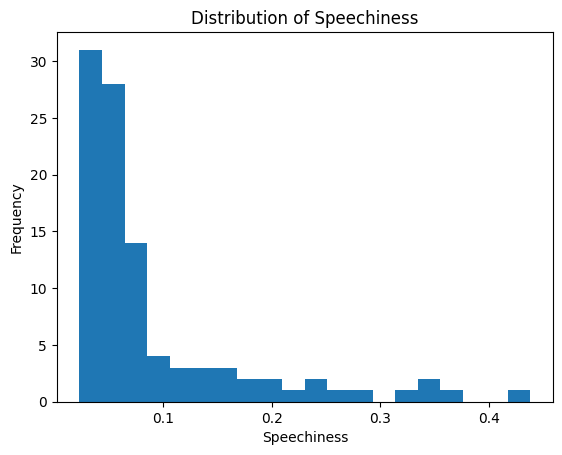

In [142]:
# Histogram of all of the different metrics

import matplotlib.pyplot as plt

# Danceability
plt.hist(final_df['danceability'], bins=20)
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Song Danceability')
plt.show()

# Energy
plt.hist(final_df['energy'], bins=20)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Song Energy')
plt.show()

# Valence
plt.hist(final_df['valence'], bins=20)
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.title('Distribution of Song Valence')
plt.show()

# Tempo
plt.hist(final_df['tempo'], bins=20)
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Tempo')
plt.show()

# Speechiness
plt.hist(final_df['speechiness'], bins=20)
plt.xlabel('Speechiness')
plt.ylabel('Frequency')
plt.title('Distribution of Speechiness')
plt.show()


# Focused Analysis that Answers Questions

In [2]:
# What is the relationship between key attributes and song popularity

In [28]:
# How do these attributes change depending on the genre of music and era

In [30]:
# Are the attributes of popular spotify songs consistent with the attributes 
# of average songs of the same genre and era

final_df.describe()

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo,Year
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.657080,0.622630,-6.113580,0.090671,0.003161,0.158887,0.490362,120.686560,2014.740000
std,0.136805,0.165219,2.026686,0.084304,0.018625,0.123541,0.224446,29.970898,7.574039
min,0.351000,0.264000,-10.965000,0.023200,0.000000,0.034400,0.061200,72.795000,1975.000000
25%,0.562500,0.518500,-7.224000,0.041200,0.000000,0.093475,0.333250,98.001500,2014.000000
50%,0.679500,0.636000,-5.763500,0.057100,0.000000,0.111000,0.474500,116.417000,2017.000000
75%,0.759250,0.760500,-4.731500,0.095625,0.000056,0.164750,0.662000,144.441000,2018.250000
max,0.921000,0.922000,-2.749000,0.438000,0.134000,0.790000,0.969000,186.003000,2022.000000


### How I'm going to answer my research questions:

What is the relationship between key attributes and song popularity:

-- correlation graph, plot streams on spotify vs the key attributes: energy, danceability, speechiness, valence, tempo


How do these attributes change depending on the genre of music and era:

-- compare and graph average attributes across different genres of music and era provided in the text.

Are the attributes of popular spotify songs consistent with the attributes of average songs of the same genre and era:

-- utilize df.describe() with specific genres and eras to ge the mean values of certain attributes from this list and compare them to the mean values of the average songs of the same genre and era. In doing this, I will be able to compare these top hits with the average song in the same category to determine whether these songs do anything specifically different which may contribute to their popular status. i.e. Rock songs on this list might show that they have with higher than average energy or lower than average instrumentalness when compared to the average rock song.
